In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
ensembles = 500
N = 65536                           # Samples per ensemble (16 bit)
rms_values = [0.5, 1, 2]
f = 30e3                            # 30 kHz Frequency
t = np.arange(N)/f

Q1. Verify that the mean of power is centered around the variance of the voltage.

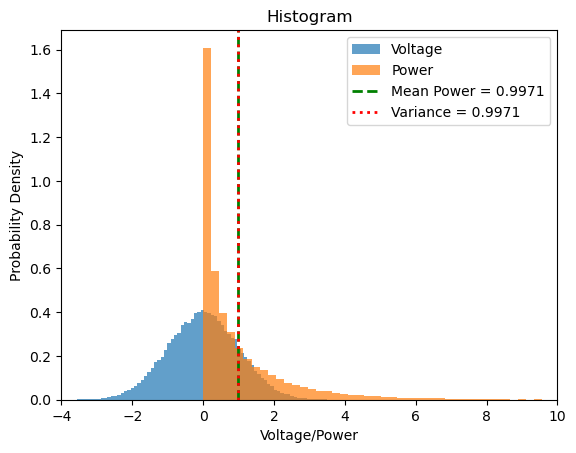

In [19]:
sigma = 1
V = np.random.normal(0, sigma, N)
P = V**2
mean_power = np.mean(P)
variance_voltage = np.var(V)
plt.figure()
plt.hist(V, bins=100, density=True, alpha=0.7, label='Voltage')
plt.hist(P, bins=100, density=True, alpha=0.7, label='Power')
plt.axvline(mean_power, linestyle='--', color = 'g', linewidth=2, label=f'Mean Power = {mean_power:.4f}')
plt.axvline(variance_voltage, linestyle=':', color = 'r', linewidth=2, label=f'Variance = {variance_voltage:.4f}')
plt.xlim(-4, 10)
plt.title("Histogram")
plt.xlabel("Voltage/Power")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

Q2. Consider cases of different RMS and plot their Histograms.

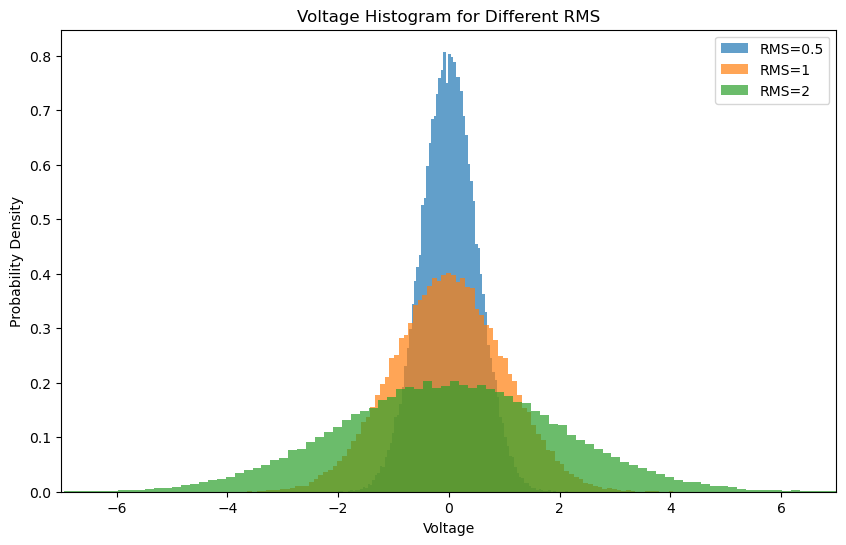

In [20]:
plt.figure(figsize=(10,6))
for rms in rms_values:
    V = np.random.normal(0, rms, N)
    plt.hist(V, bins=100, density=True, alpha=0.7, label=f'RMS={rms}')
plt.xlim(-7, 7)
plt.title("Voltage Histogram for Different RMS")
plt.xlabel("Voltage")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

Q3.How will the histogram change if a slowly varying sine wave is added in it.

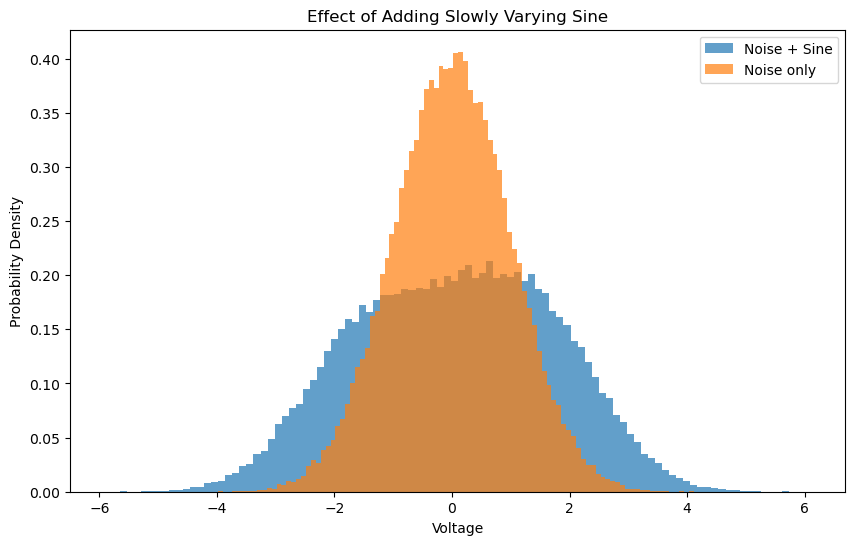

In [21]:
sigma = 1
A = 2
f = 0.5
noise = np.random.normal(0, sigma, N)
sine = A*np.sin(2*np.pi*f*t)
V_sine = noise + sine
plt.figure(figsize=(10,6))
plt.hist(V_sine, bins=100, density=True, alpha=0.7, label='Noise + Sine')
plt.hist(noise, bins=100, density=True, alpha=0.7, label='Noise only')
plt.title("Effect of Adding Slowly Varying Sine")
plt.xlabel("Voltage")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

Q4. How are the Variances of the ensembles distributed?

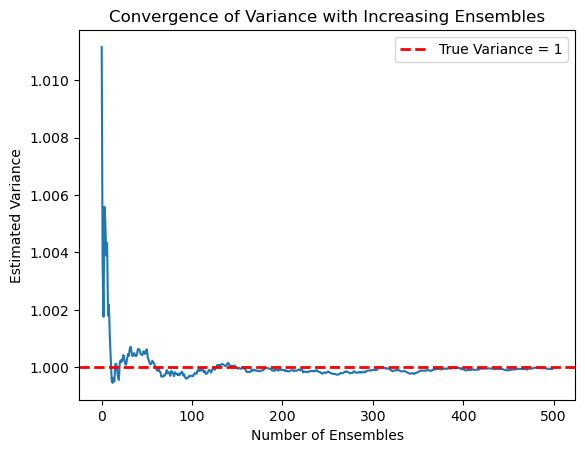

In [22]:
variance_estimates = []
running_mean_variance = []
for k in range(1, ensembles + 1):
    V = np.random.normal(0, sigma, N)
    var = np.var(V)
    variance_estimates.append(var)
    running_mean_variance.append(np.mean(variance_estimates))
running_mean_variance = np.array(running_mean_variance)
plt.figure()
plt.plot(running_mean_variance)
plt.axhline(sigma**2, linestyle='--', color = 'r', linewidth=2, label=f'True Variance = {sigma**2}')
plt.title("Convergence of Variance with Increasing Ensembles")
plt.xlabel("Number of Ensembles")
plt.ylabel("Estimated Variance")
plt.legend()
plt.show()